In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
import zipfile
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

In [47]:
# Define the path to the zip file in your Google Drive
zip_path = '/content/drive/My Drive/datasets/stock market data.zip'

# Define the extraction path
extract_path = '/content/stock_market_data'

# Create the directory if it does not exist
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Data extracted successfully!")

Data extracted successfully!


In [48]:
# List the files in the extracted folder
extracted_files = os.listdir(extract_path)
print(extracted_files)

['GOOGL.csv', 'stock_market_data.csv', 'IBM.csv', 'TSLA.csv', 'AAPL.csv', 'GS.csv', 'AMZN.csv', 'MSFT.csv', 'GE.csv', 'FB.csv', 'JPM.csv']


In [49]:
stock_data = pd.read_csv('stock_market_data/AAPL.csv')
stock_data.head()

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
1,2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2,2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
3,2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
4,2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


In [50]:
stock_data.shape

(3732, 64)

In [51]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

In [52]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3732 non-null   object 
 1   Open              3732 non-null   float64
 2   High              3732 non-null   float64
 3   Low               3732 non-null   float64
 4   Close(t)          3732 non-null   float64
 5   Volume            3732 non-null   int64  
 6   SD20              3732 non-null   float64
 7   Upper_Band        3732 non-null   float64
 8   Lower_Band        3732 non-null   float64
 9   S_Close(t-1)      3732 non-null   float64
 10  S_Close(t-2)      3732 non-null   float64
 11  S_Close(t-3)      3732 non-null   float64
 12  S_Close(t-5)      3732 non-null   float64
 13  S_Open(t-1)       3732 non-null   float64
 14  MA5               3732 non-null   float64
 15  MA10              3732 non-null   float64
 16  MA20              3732 non-null   float64


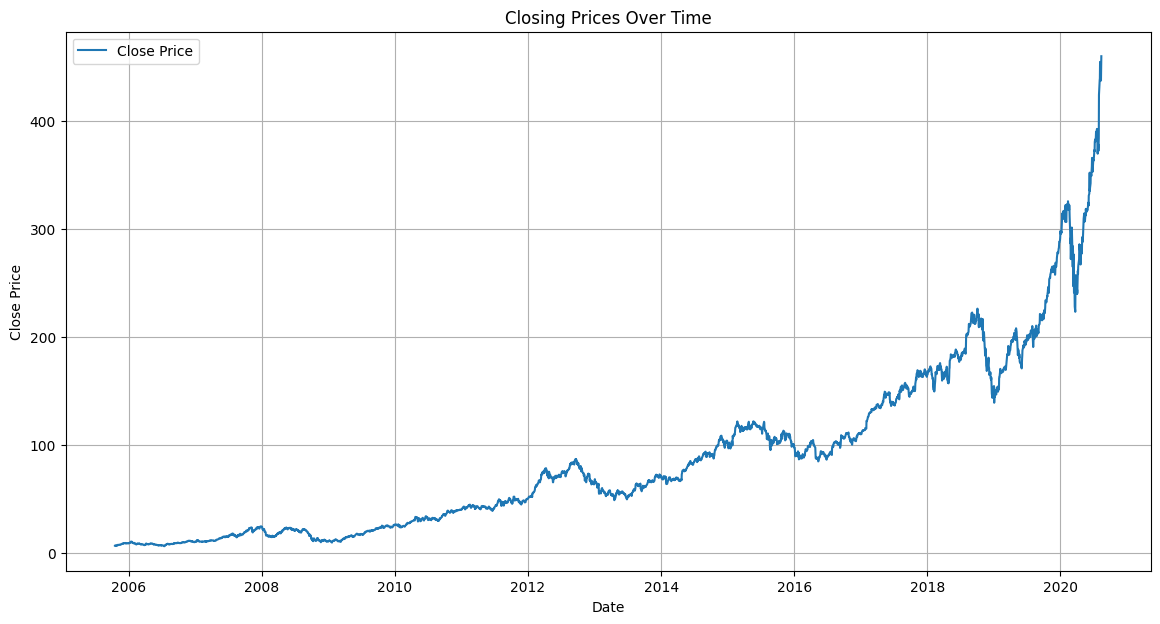

In [53]:
# Convert 'Date' column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Line plot of Closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['Close(t)'], label='Close Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

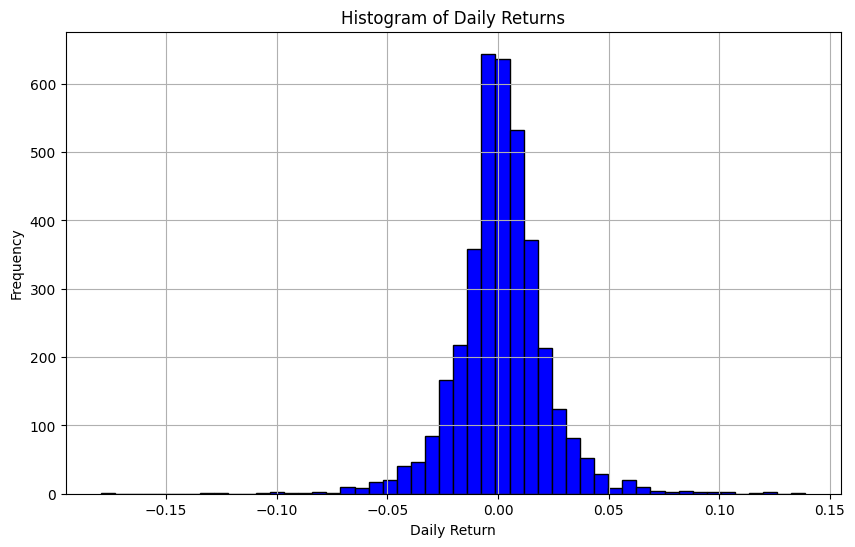

In [54]:
# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Close(t)'].pct_change()

# Histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(stock_data['Daily_Return'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

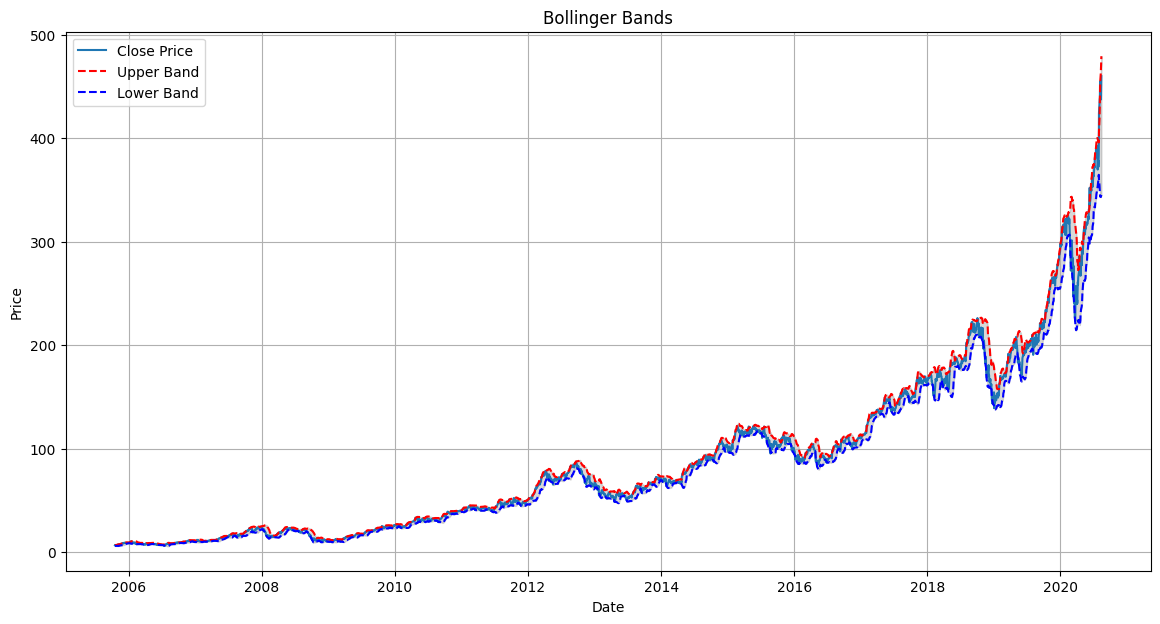

In [55]:
# Plot Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['Close(t)'], label='Close Price')
plt.plot(stock_data['Date'], stock_data['Upper_Band'], label='Upper Band', linestyle='--', color='red')
plt.plot(stock_data['Date'], stock_data['Lower_Band'], label='Lower Band', linestyle='--', color='blue')
plt.fill_between(stock_data['Date'], stock_data['Lower_Band'], stock_data['Upper_Band'], color='grey', alpha=0.3)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

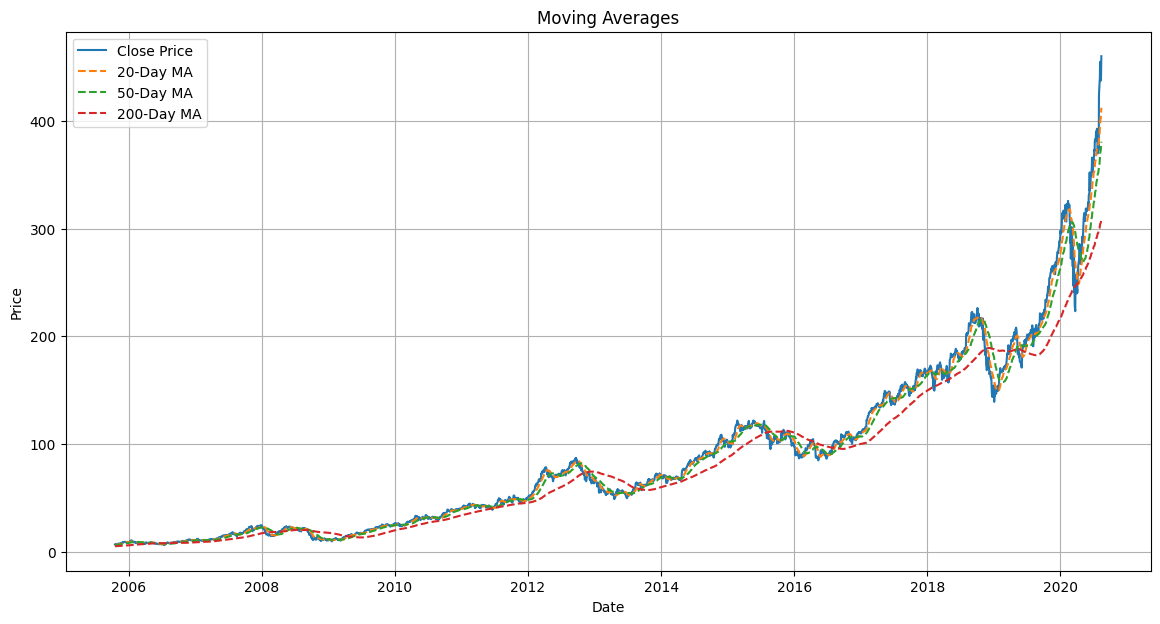

In [56]:
# Plot Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['Close(t)'], label='Close Price')
plt.plot(stock_data['Date'], stock_data['MA20'], label='20-Day MA', linestyle='--')
plt.plot(stock_data['Date'], stock_data['MA50'], label='50-Day MA', linestyle='--')
plt.plot(stock_data['Date'], stock_data['MA200'], label='200-Day MA', linestyle='--')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

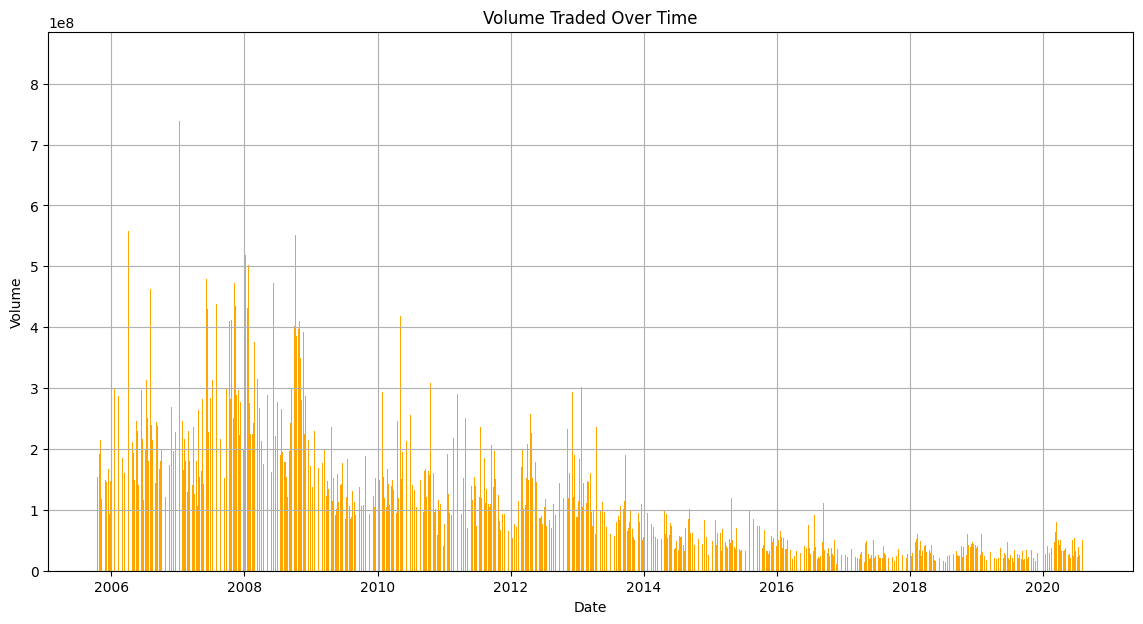

In [57]:
# Plot Volume traded over time
plt.figure(figsize=(14, 7))
plt.bar(stock_data['Date'], stock_data['Volume'], color='orange')
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

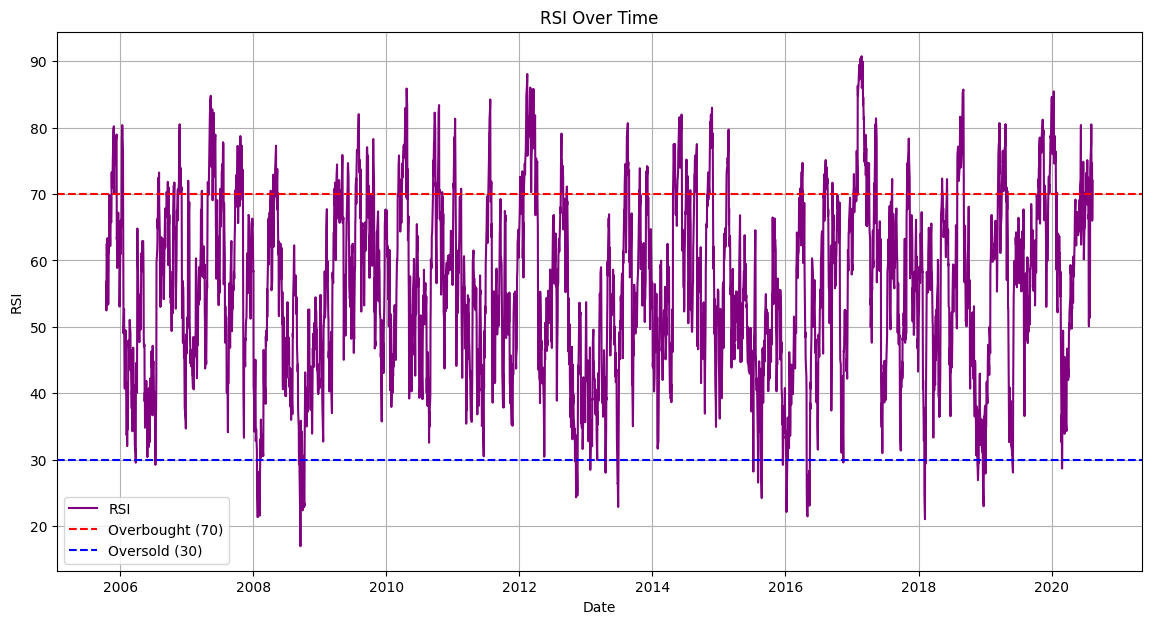

In [58]:
# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['RSI'], label='RSI', color='purple')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='blue', linestyle='--', label='Oversold (30)')
plt.title('RSI Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

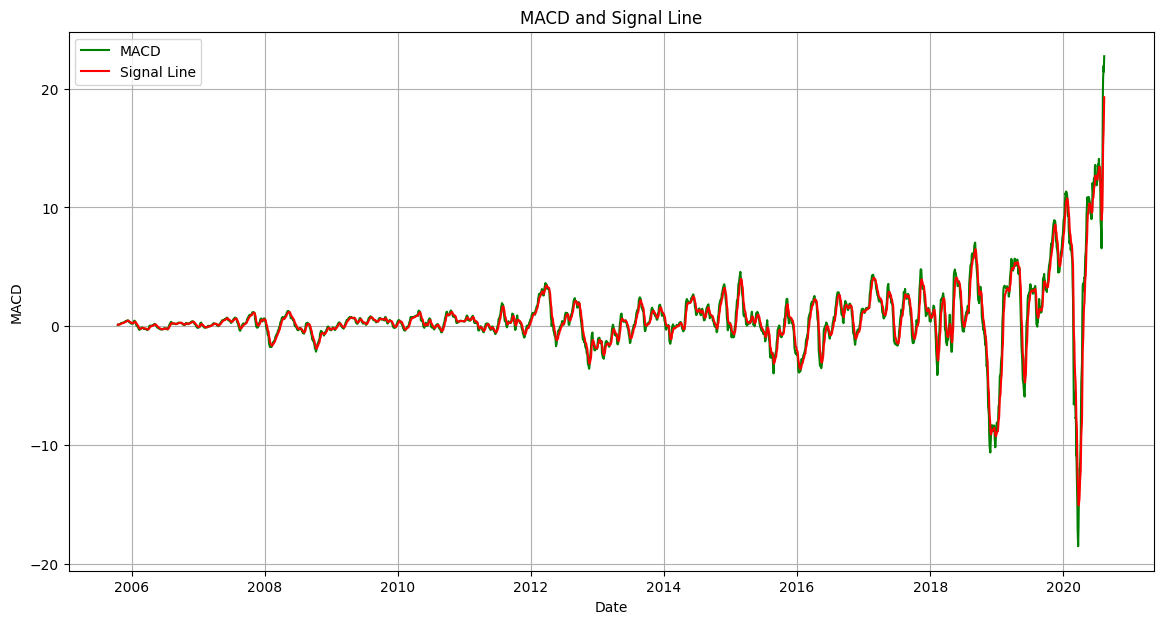

In [59]:
# Plot MACD and Signal Line
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Date'], stock_data['MACD'], label='MACD', color='green')
plt.plot(stock_data['Date'], stock_data['MACD_EMA'], label='Signal Line', color='red')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
# Exclude the date columns
stock_data_no_dates = stock_data.drop(columns=['Date', 'Date_col'])

# Compute the correlation matrix with the target variable 'Close_forcast'
correlation_with_target = stock_data_no_dates.corr()['Close_forcast'].sort_values(ascending=False)

# Filter for high positive and high negative correlations
high_positive_correlation = correlation_with_target[correlation_with_target >= 0.5]
high_negative_correlation = correlation_with_target[correlation_with_target <= -0.5]

# Print high positive correlations
print("Columns with High Positive Correlation (>= 0.5) with Close_forcast:")
print(high_positive_correlation)

# Print high negative correlations
print("\nColumns with High Negative Correlation (<= -0.5) with Close_forcast:")
print(high_negative_correlation)

# Combine high positive and high negative correlations for heatmap
high_corr_columns = high_positive_correlation.index.union(high_negative_correlation.index)

Columns with High Positive Correlation (>= 0.5) with Close_forcast:
Close_forcast    1.000000
Close(t)         0.999523
High             0.999460
Low              0.999449
Open             0.999361
EMA10            0.999272
EMA200           0.999272
EMA50            0.999272
EMA20            0.999272
EMA100           0.999272
S_Close(t-1)     0.999196
MA5              0.999136
S_Open(t-1)      0.999021
S_Close(t-2)     0.998806
MA10             0.998479
S_Close(t-3)     0.998440
S_Close(t-5)     0.997598
MA20             0.997032
Upper_Band       0.995884
Lower_Band       0.995693
MA50             0.991779
MA200            0.979891
QQQ_Close        0.979265
QQQ(t-1)         0.978980
QQQ(t-2)         0.978646
QQQ_MA10         0.978263
QQQ(t-5)         0.977662
QQQ_MA20         0.977029
QQQ_MA50         0.972675
SnP_Close        0.925233
SnP(t-1))        0.924934
SnP(t-5)         0.923440
DJIA_Close       0.918060
DJIA(t-1))       0.917832
DJIA(t-5)        0.916650
Year             0.893

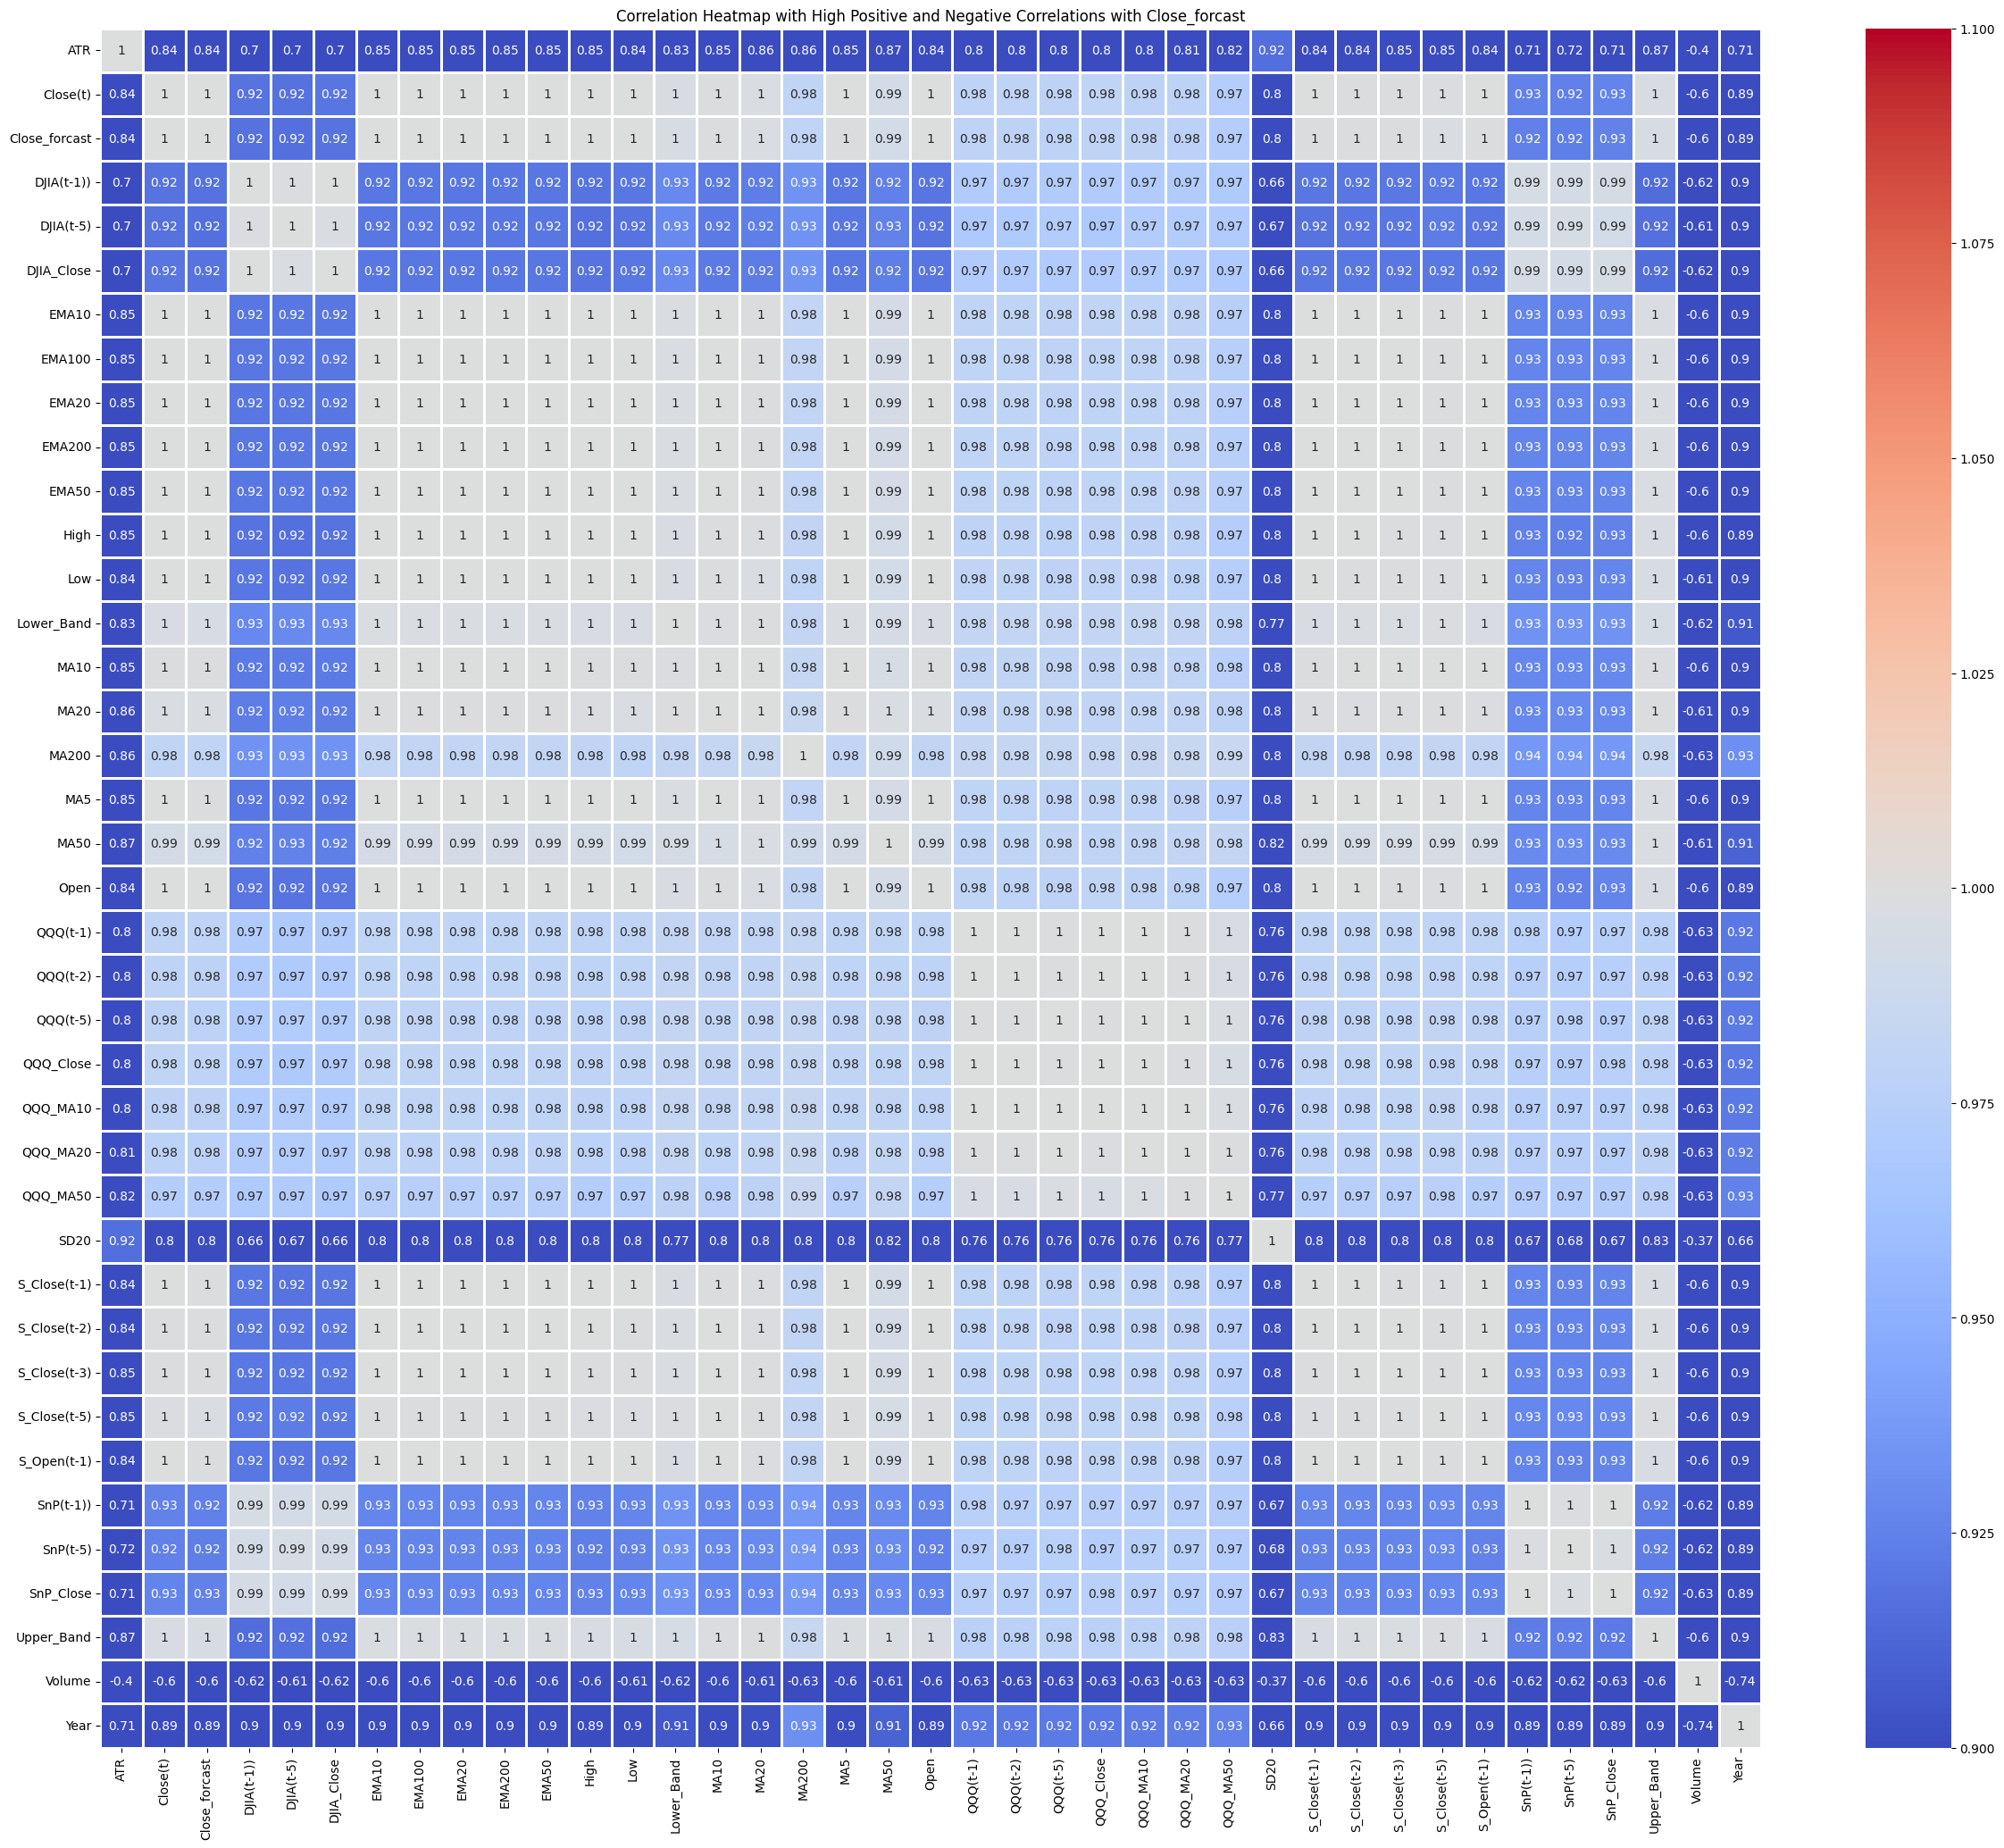

In [61]:
# Plot the correlation heatmap for these columns
plt.figure(figsize=(30, 25))
sns.heatmap(stock_data_no_dates[high_corr_columns].corr(), annot=True, cmap='coolwarm', linewidths=1, vmin=1, vmax=1)
plt.title('Correlation Heatmap with High Positive and Negative Correlations with Close_forcast')
plt.show()

In [62]:
# Combine high positive and high negative correlations
high_corr_columns = high_positive_correlation.index.union(high_negative_correlation.index)

# Filter the original dataset to keep only the columns with high correlation
filtered_data = stock_data[['Date', 'Date_col'] + list(high_corr_columns)]

# Display the first few rows of the filtered data
filtered_data.head()

,Date,Date_col,ATR,Close(t),Close_forcast,DJIA(t-1)),DJIA(t-5),DJIA_Close,EMA10,EMA100,...,S_Close(t-2),S_Close(t-3),S_Close(t-5),S_Open(t-1),SnP(t-1)),SnP(t-5),SnP_Close,Upper_Band,Volume,Year
0,2005-10-17,2005-10-17,0.226843,6.60,6.45,10287.34,10238.76,10348.10,6.523675,6.523675,...,6.63,6.08,6.22,6.67,1186.57,1187.33,1190.10,6.827473,154208600,2005
1,2005-10-18,2005-10-18,0.226355,6.45,6.78,10348.10,10253.17,10285.26,6.499117,6.499117,...,6.67,6.63,6.37,6.66,1190.10,1184.87,1178.14,6.819677,152397000,2005
2,2005-10-19,2005-10-19,0.243043,6.78,6.93,10285.26,10216.91,10414.13,6.592744,6.592744,...,6.60,6.67,6.08,6.57,1178.14,1177.68,1195.76,6.861112,252170800,2005
3,2005-10-20,2005-10-20,0.244255,6.93,6.87,10414.13,10216.59,10281.10,6.705163,6.705163,...,6.45,6.60,6.63,6.43,1195.76,1176.84,1177.80,6.931847,339440500,2005
4,2005-10-21,2005-10-21,0.241094,6.87,7.01,10281.10,10287.34,10215.22,6.760109,6.760109,...,6.78,6.45,6.67,6.72,1177.80,1186.57,1179.59,6.974860,199181500,2005


In [63]:
filtered_data.shape

(3732, 41)

In [64]:
filtered_data.columns

Index(['Date', 'Date_col', 'ATR', 'Close(t)', 'Close_forcast', 'DJIA(t-1))',
       'DJIA(t-5)', 'DJIA_Close', 'EMA10', 'EMA100', 'EMA20', 'EMA200',
       'EMA50', 'High', 'Low', 'Lower_Band', 'MA10', 'MA20', 'MA200', 'MA5',
       'MA50', 'Open', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)', 'QQQ_Close',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SD20', 'S_Close(t-1)',
       'S_Close(t-2)', 'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)',
       'SnP(t-1))', 'SnP(t-5)', 'SnP_Close', 'Upper_Band', 'Volume', 'Year'],
      dtype='object')

# **Data Preparation**

In [65]:
# Drop 'Date' and 'Date_col' columns from the filtered data
filtered_data = filtered_data.drop(columns=['Date', 'Date_col'])

In [66]:
# Split data into features and target
X = filtered_data.drop(columns=['Close_forcast'])
y = filtered_data['Close_forcast']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Standardize features for ML models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [67]:
X_train_scaled.head()

,ATR,Close(t),DJIA(t-1)),DJIA(t-5),DJIA_Close,EMA10,EMA100,EMA20,EMA200,EMA50,...,S_Close(t-2),S_Close(t-3),S_Close(t-5),S_Open(t-1),SnP(t-1)),SnP(t-5),SnP_Close,Upper_Band,Volume,Year
0,-1.201455,-1.187596,-0.985227,-1.000084,-0.963663,-1.188723,-1.188723,-1.188723,-1.188723,-1.188723,...,-1.184993,-1.200643,-1.194664,-1.184608,-0.739286,-0.734584,-0.729652,-1.201942,0.048384,-1.821146
1,-1.202152,-1.192099,-0.962940,-0.994795,-0.986707,-1.189461,-1.189461,-1.189461,-1.189461,-1.189461,...,-1.183792,-1.184124,-1.190158,-1.184908,-0.729038,-0.741735,-0.764362,-1.202166,0.030177,-1.821146
2,-1.178340,-1.182191,-0.985990,-1.008104,-0.939449,-1.186648,-1.186648,-1.186648,-1.186648,-1.186648,...,-1.185894,-1.182922,-1.198870,-1.187608,-0.763761,-0.762637,-0.713226,-1.200974,1.032963,-1.821146
3,-1.176612,-1.177688,-0.938721,-1.008221,-0.988233,-1.183270,-1.183270,-1.183270,-1.183270,-1.183270,...,-1.190399,-1.185025,-1.182348,-1.191809,-0.712605,-0.765079,-0.765348,-1.198940,1.910076,-1.821146
4,-1.181122,-1.179489,-0.987515,-0.982253,-1.012392,-1.181619,-1.181619,-1.181619,-1.181619,-1.181619,...,-1.180488,-1.189530,-1.181146,-1.183108,-0.764748,-0.736793,-0.760154,-1.197702,0.500389,-1.821146


# **Machine Learning Models**

In [70]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test_scaled)

# Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
xgb_predictions = xgb_model.predict(X_test_scaled)

# Initialize the SVM model
svm_model = SVR()

# Fit the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
svm_predictions = svm_model.predict(X_test_scaled)

In [74]:
# Reshape data for LSTM
X_train_lstm = np.reshape(X_train_scaled.values, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled.values, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile and train LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)

# Predict with LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm)

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 3131.7966
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2608.2986
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2245.2451
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1919.2192
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1684.2860
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1415.9818
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1375.5060
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1231.2329
Epoch 9/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1089.9457
Epoch 10/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1038.0601
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [75]:
# Calculate and print the Mean Squared Error
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Mean Squared Error: {rf_mse}')

# Calculate and print the Mean Squared Error
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f'XGBoost Mean Squared Error: {xgb_mse}')

# Calculate and print the Mean Squared Error
svm_mse = mean_squared_error(y_test, svm_predictions)
print(f'SVM Mean Squared Error: {svm_mse}')

# Calculate Mean Squared Error for LSTM predictions
lstm_mse = mean_squared_error(y_test, y_pred_lstm)

# Print the MSE value
print(f'LSTM Mean Squared Error: {lstm_mse}')

Random Forest Mean Squared Error: 9374.595197491457
XGBoost Mean Squared Error: 9944.89602148029
SVM Mean Squared Error: 20756.566331140315
LSTM Mean Squared Error: 26161.456115034693


In [77]:
# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Evaluate Random Forest
rf_rmse = calculate_rmse(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R²: {rf_r2}')

# Evaluate XGBoost
xgb_rmse = calculate_rmse(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f'XGBoost RMSE: {xgb_rmse}')
print(f'XGBoost R²: {xgb_r2}')

# Evaluate SVM
svm_rmse = calculate_rmse(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
print(f'SVM RMSE: {svm_rmse}')
print(f'SVM R²: {svm_r2}')

# Evaluate LSTM
lstm_rmse = calculate_rmse(y_test, y_pred_lstm)
lstm_r2 = r2_score(y_test, y_pred_lstm)
print(f'LSTM RMSE: {lstm_rmse}')
print(f'LSTM R²: {lstm_r2}')

Random Forest RMSE: 96.82249324145427
Random Forest R²: -0.7903025247085511
XGBoost RMSE: 99.7240995019774
XGBoost R²: -0.8992150679726896
SVM RMSE: 144.0713931741493
SVM R²: -2.9639613576983868
LSTM RMSE: 161.74503428246163
LSTM R²: -3.9961539614352244


In [78]:
data = {
    'Model': ['Random Forest', 'XGBoost', 'SVM', 'LSTM'],
    'MSE': [rf_mse, xgb_mse, svm_mse, lstm_mse],
    'RMSE': [rf_rmse, xgb_rmse, svm_rmse, lstm_rmse],
    'R2': [rf_r2, xgb_r2, svm_r2, lstm_r2]
}

df = pd.DataFrame(data)

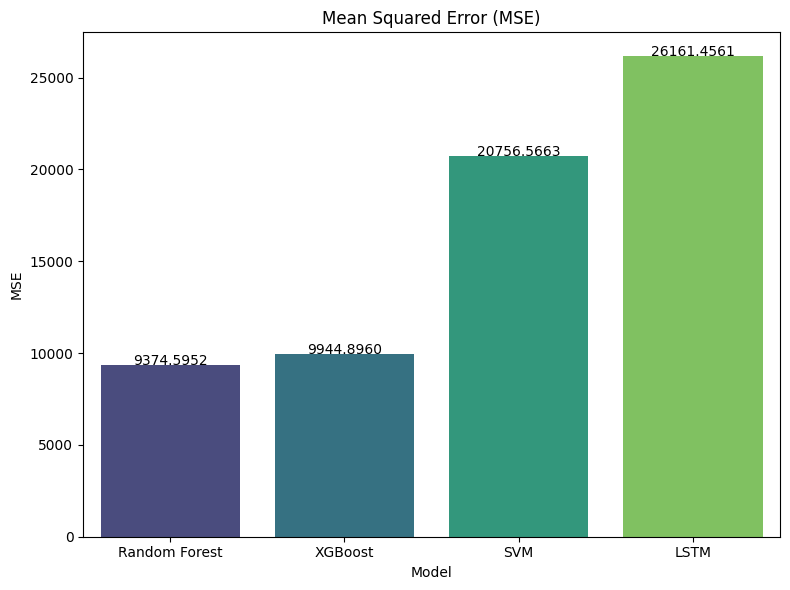

In [81]:
# Plot Mean Squared Error (MSE)
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='MSE', data=df, palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xlabel('Model')

# Annotate the bars for MSE
for index, value in enumerate(df['MSE']):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center')

plt.tight_layout()
plt.show()

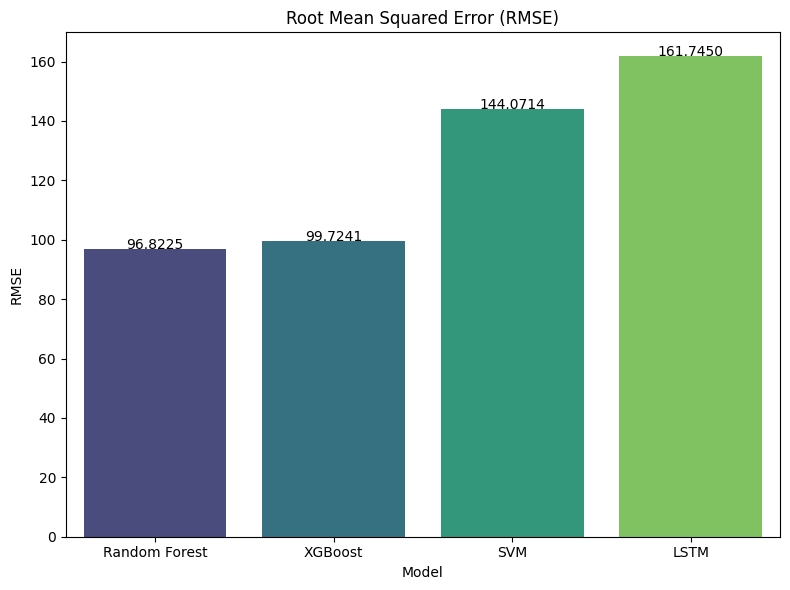

In [82]:
# Plot Root Mean Squared Error (RMSE)
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='RMSE', data=df, palette='viridis')
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.xlabel('Model')

# Annotate the bars for RMSE
for index, value in enumerate(df['RMSE']):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center')

plt.tight_layout()
plt.show()

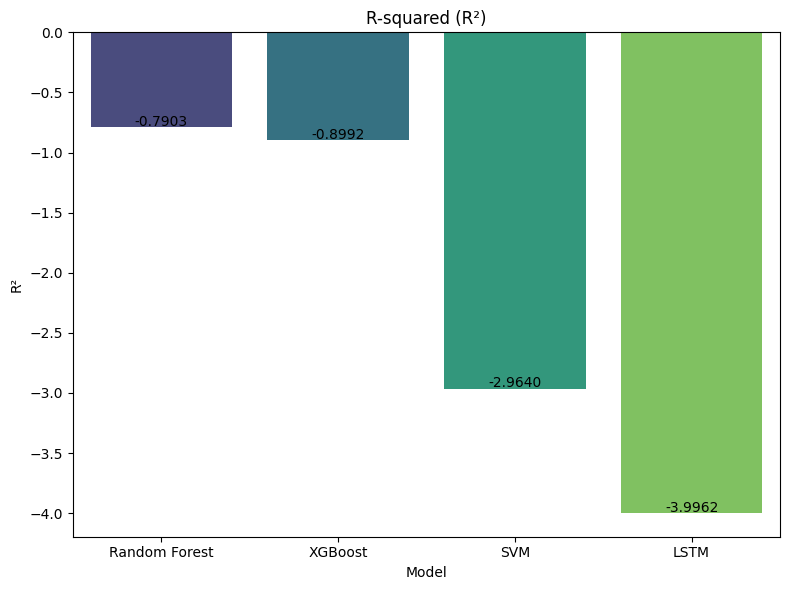

In [83]:
# Plot R-squared (R²)
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='R2', data=df, palette='viridis')
plt.title('R-squared (R²)')
plt.ylabel('R²')
plt.xlabel('Model')

# Annotate the bars for R²
for index, value in enumerate(df['R2']):
    plt.text(index, value + 0.01, f'{value:.4f}', ha='center')

plt.tight_layout()
plt.show()

In [114]:
# Convert predictions to DataFrame for easy plotting
rf_predictions_df = pd.Series(rf_predictions, index=X_test.index, name='Random Forest')
xgb_predictions_df = pd.Series(xgb_predictions, index=X_test.index, name='XGBoost')
svm_predictions_df = pd.Series(svm_predictions, index=X_test.index, name='SVM')
lstm_predictions_df = pd.Series(y_pred_lstm.flatten(), index=X_test.index, name='LSTM')

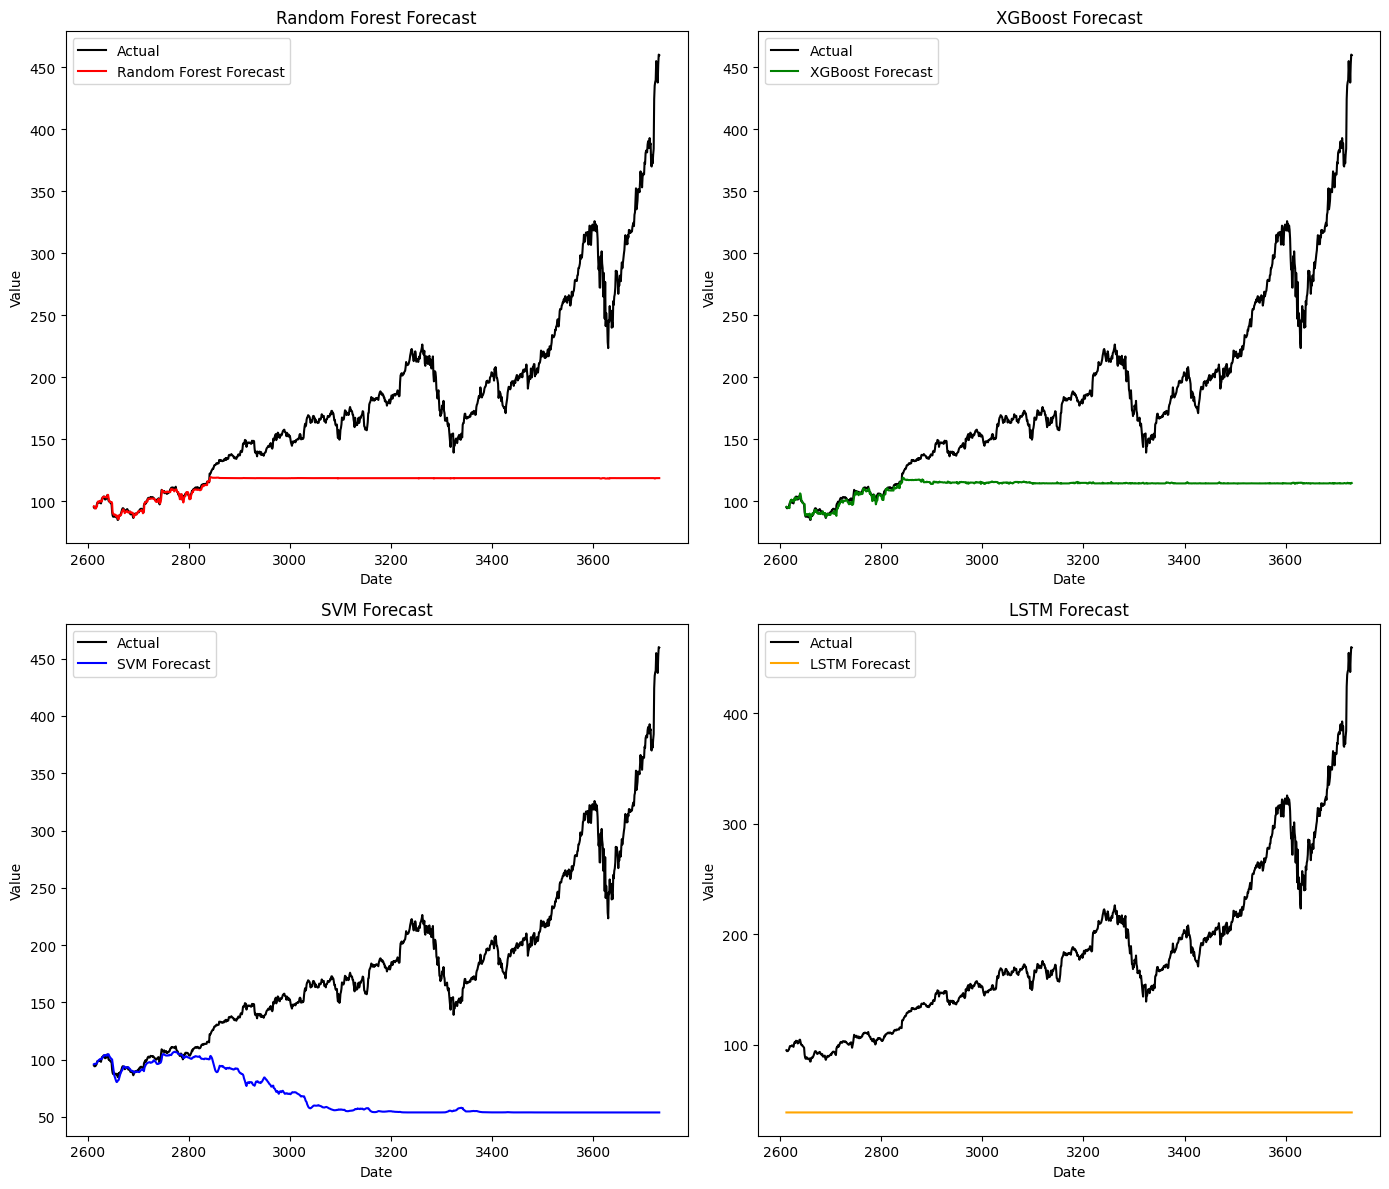

In [115]:
plt.figure(figsize=(14, 12))

# Plot actual vs forecasted values for Random Forest
plt.subplot(2, 2, 1)
plt.plot(X_test.index, y_test, label='Actual', color='black')
plt.plot(rf_predictions_df.index, rf_predictions_df, label='Random Forest Forecast', color='red')
plt.title('Random Forest Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Plot actual vs forecasted values for XGBoost
plt.subplot(2, 2, 2)
plt.plot(X_test.index, y_test, label='Actual', color='black')
plt.plot(xgb_predictions_df.index, xgb_predictions_df, label='XGBoost Forecast', color='green')
plt.title('XGBoost Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Plot actual vs forecasted values for SVM
plt.subplot(2, 2, 3)
plt.plot(X_test.index, y_test, label='Actual', color='black')
plt.plot(svm_predictions_df.index, svm_predictions_df, label='SVM Forecast', color='blue')
plt.title('SVM Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Plot actual vs forecasted values for LSTM
plt.subplot(2, 2, 4)
plt.plot(X_test.index, y_test, label='Actual', color='black')
plt.plot(lstm_predictions_df.index, lstm_predictions_df, label='LSTM Forecast', color='orange')
plt.title('LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

# **Time Series Models**

In [94]:
# Filter the original dataset to keep only the columns with high correlation
time_series_data = stock_data[['Date'] + list(high_corr_columns)]

# Display the first few rows of the filtered data
time_series_data.head()

,Date,ATR,Close(t),Close_forcast,DJIA(t-1)),DJIA(t-5),DJIA_Close,EMA10,EMA100,EMA20,...,S_Close(t-2),S_Close(t-3),S_Close(t-5),S_Open(t-1),SnP(t-1)),SnP(t-5),SnP_Close,Upper_Band,Volume,Year
0,2005-10-17,0.226843,6.60,6.45,10287.34,10238.76,10348.10,6.523675,6.523675,6.523675,...,6.63,6.08,6.22,6.67,1186.57,1187.33,1190.10,6.827473,154208600,2005
1,2005-10-18,0.226355,6.45,6.78,10348.10,10253.17,10285.26,6.499117,6.499117,6.499117,...,6.67,6.63,6.37,6.66,1190.10,1184.87,1178.14,6.819677,152397000,2005
2,2005-10-19,0.243043,6.78,6.93,10285.26,10216.91,10414.13,6.592744,6.592744,6.592744,...,6.60,6.67,6.08,6.57,1178.14,1177.68,1195.76,6.861112,252170800,2005
3,2005-10-20,0.244255,6.93,6.87,10414.13,10216.59,10281.10,6.705163,6.705163,6.705163,...,6.45,6.60,6.63,6.43,1195.76,1176.84,1177.80,6.931847,339440500,2005
4,2005-10-21,0.241094,6.87,7.01,10281.10,10287.34,10215.22,6.760109,6.760109,6.760109,...,6.78,6.45,6.67,6.72,1177.80,1186.57,1179.59,6.974860,199181500,2005


In [95]:
# Ensure 'Date' column is datetime type
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])

# Set 'Date' as the index
time_series_data.set_index('Date', inplace=True)

# Display the first few rows
time_series_data.head()

,ATR,Close(t),Close_forcast,DJIA(t-1)),DJIA(t-5),DJIA_Close,EMA10,EMA100,EMA20,EMA200,...,S_Close(t-2),S_Close(t-3),S_Close(t-5),S_Open(t-1),SnP(t-1)),SnP(t-5),SnP_Close,Upper_Band,Volume,Year
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,0.226843,6.60,6.45,10287.34,10238.76,10348.10,6.523675,6.523675,6.523675,6.523675,...,6.63,6.08,6.22,6.67,1186.57,1187.33,1190.10,6.827473,154208600,2005
2005-10-18,0.226355,6.45,6.78,10348.10,10253.17,10285.26,6.499117,6.499117,6.499117,6.499117,...,6.67,6.63,6.37,6.66,1190.10,1184.87,1178.14,6.819677,152397000,2005
2005-10-19,0.243043,6.78,6.93,10285.26,10216.91,10414.13,6.592744,6.592744,6.592744,6.592744,...,6.60,6.67,6.08,6.57,1178.14,1177.68,1195.76,6.861112,252170800,2005
2005-10-20,0.244255,6.93,6.87,10414.13,10216.59,10281.10,6.705163,6.705163,6.705163,6.705163,...,6.45,6.60,6.63,6.43,1195.76,1176.84,1177.80,6.931847,339440500,2005
2005-10-21,0.241094,6.87,7.01,10281.10,10287.34,10215.22,6.760109,6.760109,6.760109,6.760109,...,6.78,6.45,6.67,6.72,1177.80,1186.57,1179.59,6.974860,199181500,2005


In [96]:
# Define the target variable
target_column = 'Close_forcast'  # Ensure this is your target column name

# Split the data into training and testing sets
train_size = int(len(time_series_data) * 0.7)
train_data = time_series_data.iloc[:train_size]
test_data = time_series_data.iloc[train_size:]

# Extract the target series
train_series = train_data[target_column]
test_series = test_data[target_column]

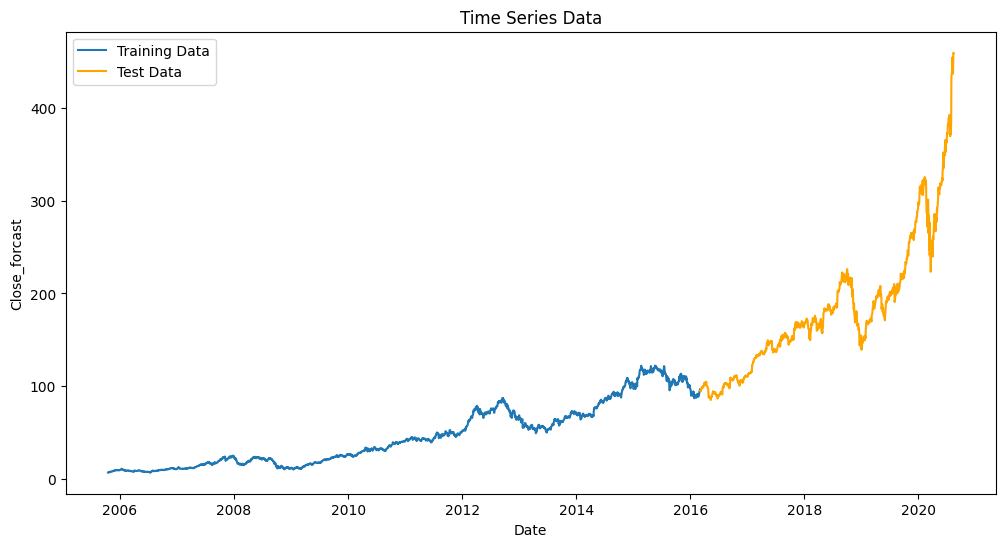

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(train_series, label='Training Data')
plt.plot(test_series, label='Test Data', color='orange')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel(target_column)
plt.legend()
plt.show()

In [99]:
# Perform Augmented Dickey-Fuller test
result = adfuller(train_series.dropna())

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -0.5196691143615839
p-value: 0.888120712567522


In [100]:
# Apply differencing
train_diff = train_series.diff().dropna()

# Re-run ADF test on differenced series
result_diff = adfuller(train_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

ADF Statistic (Differenced): -8.675102907585812
p-value (Differenced): 4.4380925188953505e-14


In [101]:
# Define ARIMA model parameters (p, d, q)
p, d, q = 1, 1, 1  # Example values, adjust as needed

# Fit ARIMA model
arima_model = ARIMA(train_series, order=(p, d, q))
arima_result = arima_model.fit()

# Print summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:          Close_forcast   No. Observations:                 2612
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3600.021
Date:                Thu, 15 Aug 2024   AIC                           7206.042
Time:                        15:10:12   BIC                           7223.645
Sample:                             0   HQIC                          7212.419
                               - 2612                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6868      0.258      2.663      0.008       0.181       1.192
ma.L1         -0.7043      0.253     -2.788      0.005      -1.199      -0.209
sigma2         0.9228      0.011     81.105      0.0

In [102]:
# Define SARIMA model parameters (p, d, q), (P, D, Q, S)
p, d, q = 1, 1, 1  # Non-seasonal order
P, D, Q, S = 1, 1, 1, 12  # Seasonal order, S is the length of seasonality

# Fit SARIMA model
sarima_model = SARIMAX(train_series, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_result = sarima_model.fit()

# Print summary
print(sarima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                      Close_forcast   No. Observations:                 2612
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3613.526
Date:                            Thu, 15 Aug 2024   AIC                           7237.052
Time:                                    15:10:48   BIC                           7266.366
Sample:                                         0   HQIC                          7247.674
                                           - 2612                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6994      0.229      3.054      0.002       0.251       1.148
ma.L1         -0.7185      0.223   

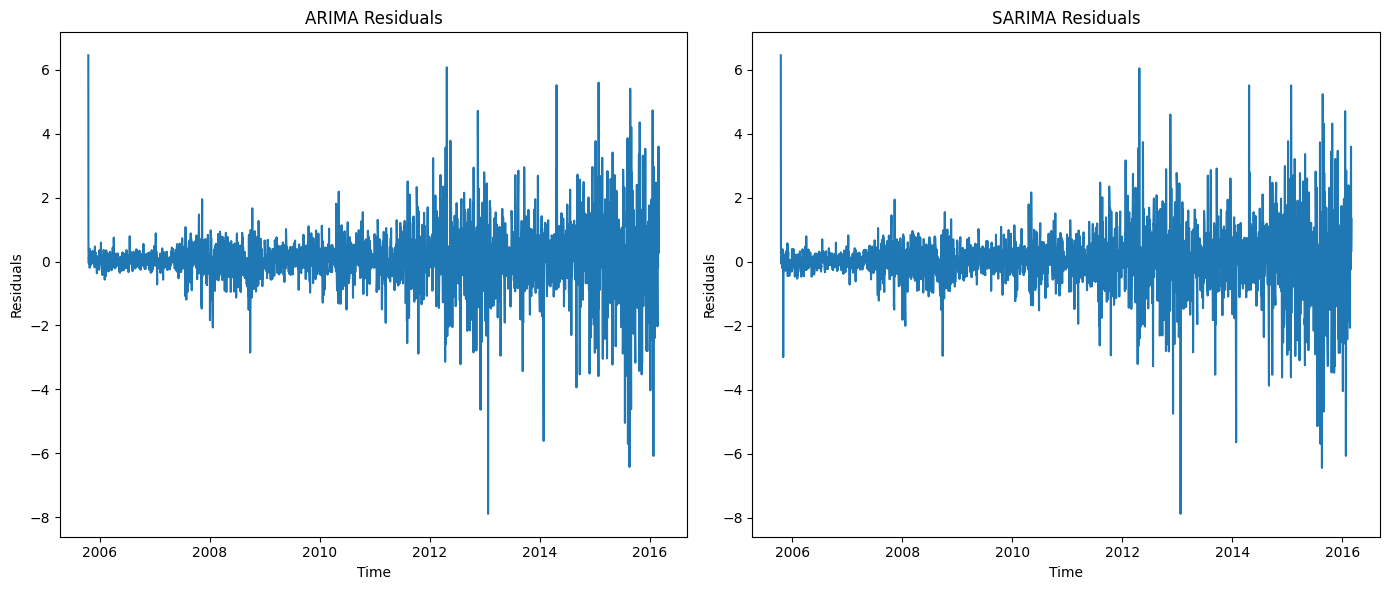

In [103]:
# Plot residuals for ARIMA
arima_residuals = arima_result.resid
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(arima_residuals)
plt.title('ARIMA Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')

# Plot residuals for SARIMA
sarima_residuals = sarima_result.resid
plt.subplot(1, 2, 2)
plt.plot(sarima_residuals)
plt.title('SARIMA Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

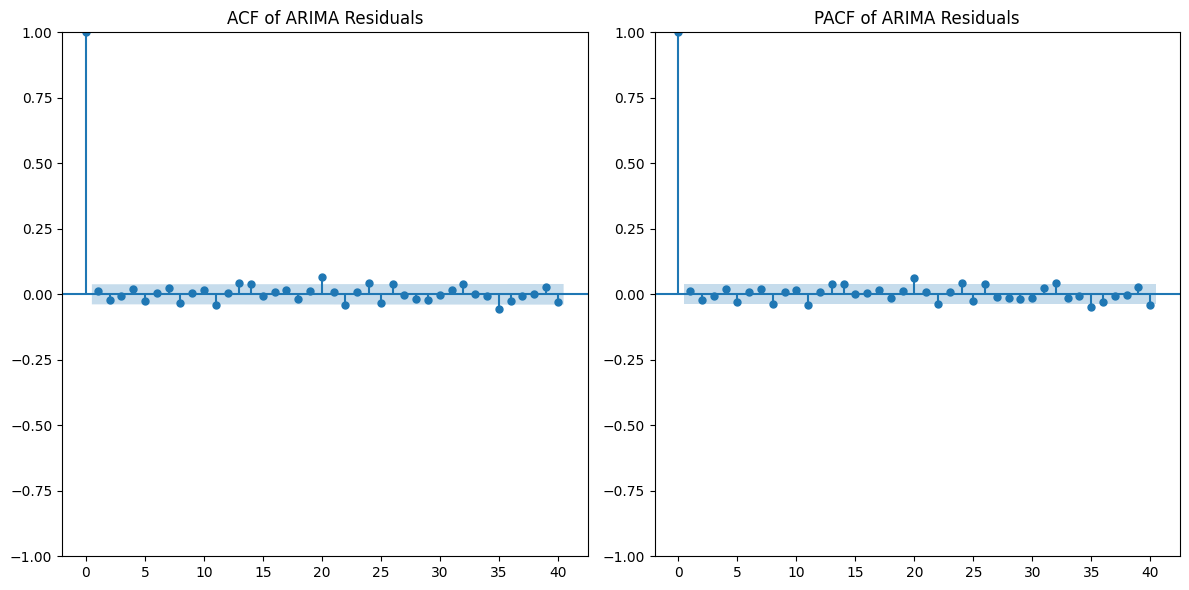

In [105]:
# Plot ACF for ARIMA residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(arima_residuals, lags=40, ax=plt.gca(), title='ACF of ARIMA Residuals')

# Plot PACF for ARIMA residuals
plt.subplot(1, 2, 2)
plot_pacf(arima_residuals, lags=40, ax=plt.gca(), title='PACF of ARIMA Residuals')

plt.tight_layout()
plt.show()

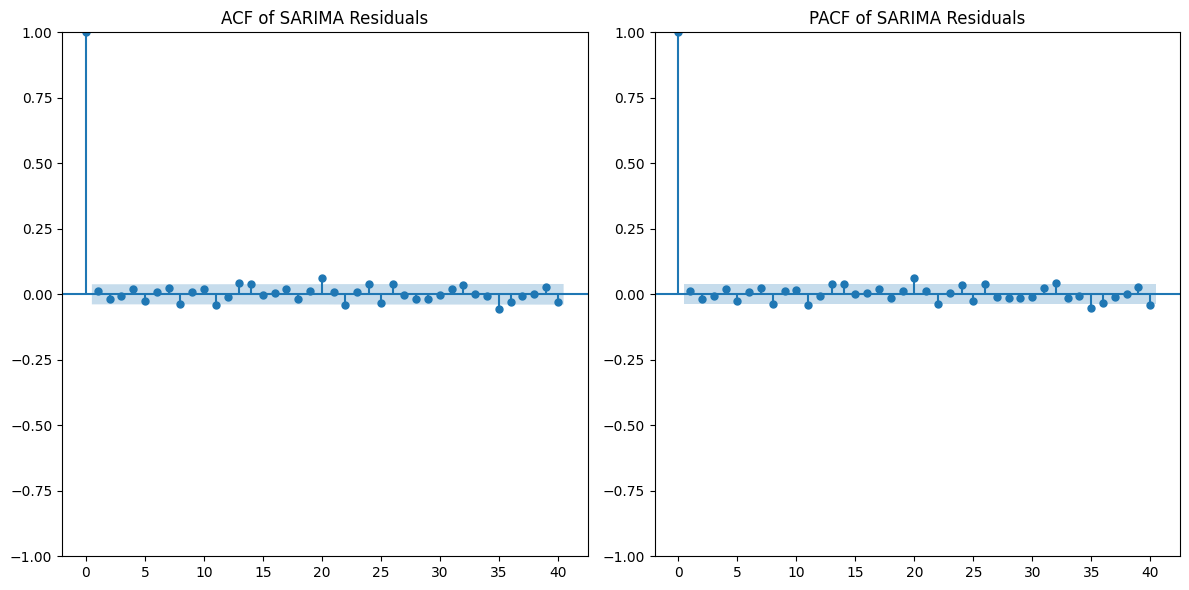

In [106]:
# Repeat for SARIMA residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(sarima_residuals, lags=40, ax=plt.gca(), title='ACF of SARIMA Residuals')

plt.subplot(1, 2, 2)
plot_pacf(sarima_residuals, lags=40, ax=plt.gca(), title='PACF of SARIMA Residuals')

plt.tight_layout()
plt.show()

In [111]:
# Forecasting with ARIMA
arima_forecast = arima_result.get_forecast(steps=len(y_test))
arima_forecast_mean = arima_forecast.predicted_mean
arima_conf_int = arima_forecast.conf_int()

# Forecasting with SARIMA
sarima_forecast = sarima_result.get_forecast(steps=len(y_test))
sarima_forecast_mean = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int()

# Calculate performance metrics
arima_mse = mean_squared_error(y_test, arima_forecast_mean)
arima_rmse = np.sqrt(arima_mse)
arima_mae = mean_absolute_error(y_test, arima_forecast_mean)

sarima_mse = mean_squared_error(y_test, sarima_forecast_mean)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(y_test, sarima_forecast_mean)

print(f'ARIMA Model - MSE: {arima_mse}, RMSE: {arima_rmse}, MAE: {arima_mae}')
print(f'SARIMA Model - MSE: {sarima_mse}, RMSE: {sarima_rmse}, MAE: {sarima_mae}')

ARIMA Model - MSE: 12893.13410584026, RMSE: 113.54793747946397, MAE: 88.14403940526489
SARIMA Model - MSE: 8587.767279953743, RMSE: 92.6702070784011, MAE: 69.24910639729072


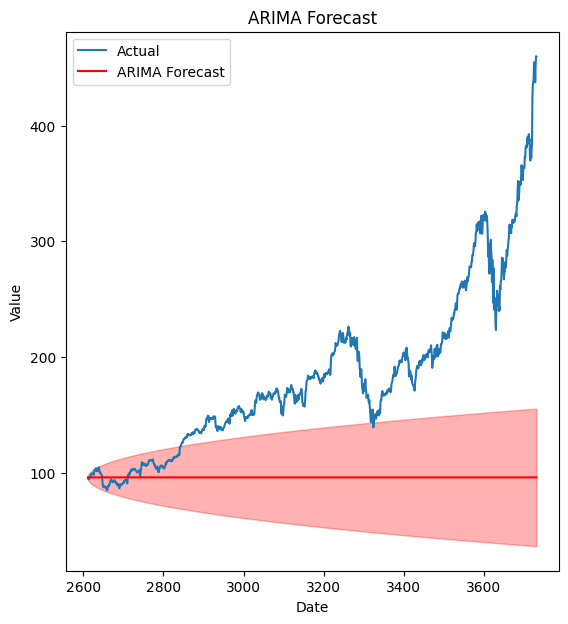

In [112]:
# Plot actual vs forecasted values
plt.figure(figsize=(14, 7))

# Plot ARIMA forecasts
plt.subplot(1, 2, 1)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, arima_forecast_mean, label='ARIMA Forecast', color='red')
plt.fill_between(y_test.index, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

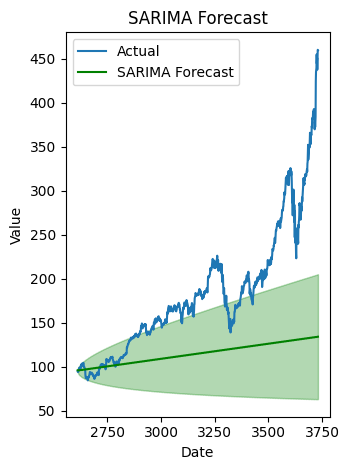

In [113]:
# Plot SARIMA forecasts
plt.subplot(1, 2, 2)
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, sarima_forecast_mean, label='SARIMA Forecast', color='green')
plt.fill_between(y_test.index, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='green', alpha=0.3)
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()